### Wybór indeksu giełdowego

Wybieram niemiecki indeks giełdowy DAX (Deutscher Aktienindex), który jest jednym z najważniejszych wskaźników rynku akcji w Niemczech.

In [3]:
# Zaimportowanie potrzebnych bibliotek

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
# Pobranie danych dla indeksu DAX i jego składników

dax_index = yf.download('^GDAXI', start='2023-05-01', end='2023-06-30')

[*********************100%%**********************]  1 of 1 completed


In [21]:
dax_components = [
    'ADS.DE', 'AIR.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE', 'BMW.DE', 'BNR.DE', 'CON.DE', 
    '1COV.DE', 'DTG.DE', 'DTE.DE', 'DWNI.DE', 'EOAN.DE', 'FME.DE', 'FRE.DE', 'HEI.DE', 
    'HEN3.DE', 'HFG.DE', 'IFX.DE', 'LIN.DE', 'MRK.DE', 'MTX.DE', 'MUV2.DE', 'PUM.DE', 'QIA.DE', 
    'RWE.DE', 'SAP.DE', 'SIE.DE', 'SY1.DE', 'SHL.DE', 'SRT3.DE', 'VOW3.DE', 'VNA.DE', 'WCH.DE', 
    'ZAL.DE', 'HNR1.DE'
]

In [22]:
# Pobranie danych dla składników indeksu

components_data = yf.download(dax_components, start='2023-05-01', end='2023-06-30')['Adj Close']

[*********************100%%**********************]  37 of 37 completed


In [23]:
# Pobranie kapitalizacji rynkowej każdej spółki

market_caps = {}
for ticker in dax_components:
    stock = yf.Ticker(ticker)
    market_caps[ticker] = stock.info['marketCap']

### Typ indeksu

Indeks DAX jest indeksem dochodowym (total return index), ważonym kapitalizacją rynkową. Uwzględnia zarówno zmiany cen akcji, jak i dochody z dywidend.

### Replikacja indeksu za pomocą jego składników

Do replikacji indeksu DAX użyję składników tego indeksu, dostępnych na stronie marketscreener. DAX składa się z 40 największych spółek notowanych na giełdzie we Frankfurcie, niestety wystąpił problem z pobraniem danych trzech z nich, dlatego uwzględnie 37 spółek.

Metoda kalkulacji:

- Składniki indeksu DAX są ważone kapitalizacją rynkową.
- Użyję kapitalizacji rynkowej każdej spółki do obliczenia jej wagi w indeksie.
- Następnie, za pomocą tych wag, obliczę wartość zreplikowanego indeksu.

In [35]:
# Przekształcenie wag do formatu DataFrame

market_caps_df = pd.DataFrame.from_dict(market_caps, orient='index', columns=['Market Cap'])
total_market_cap = market_caps_df['Market Cap'].sum()
market_caps_df['Weight'] = market_caps_df['Market Cap'] / total_market_cap

print(market_caps_df)

           Market Cap    Weight
ADS.DE    38566584320  0.022984
AIR.DE   117151662080  0.069818
ALV.DE   100604968960  0.059957
BAS.DE    40199192576  0.023957
BAYN.DE   25680562176  0.015305
BEI.DE    32219639808  0.019202
BMW.DE    55638171648  0.033158
BNR.DE     9385024512  0.005593
CON.DE    10916327424  0.006506
1COV.DE    9389814784  0.005596
DTG.DE    29542416384  0.017606
DTE.DE   113512529920  0.067649
DWNI.DE    6970178560  0.004154
EOAN.DE   32502108160  0.019370
FME.DE    10759453696  0.006412
FRE.DE    16125474816  0.009610
HEI.DE    17445754880  0.010397
HEN3.DE   32669618176  0.019470
HFG.DE      898332800  0.000535
IFX.DE    46684057600  0.027822
LIN.DE   197640224768  0.117787
MRK.DE    73542696960  0.043829
MTX.DE    12098452480  0.007210
MUV2.DE   62306340864  0.037132
PUM.DE     6647123968  0.003961
QIA.DE     9222371328  0.005496
RWE.DE    24851728384  0.014811
SAP.DE   205432471552  0.122430
SIE.DE   133054128128  0.079296
SY1.DE    16129688576  0.009613
SHL.DE  

In [36]:
# Obliczenie wartości zreplikowanego indeksu

replicated_index = (components_data * market_caps_df['Weight']).sum(axis=1)

### Porównanie wartości indeksu ze stworzonym benchmarkiem na przestrzeni 30 dni

Pobiorę dane z ostatnich 30 dni dla wszystkich składników indeksu DAX oraz samego indeksu. Następnie porównam wartości oryginalnego indeksu z wartościami zreplikowanego benchmarku.

In [37]:
# Porównanie wartości oryginalnego indeksu DAX i zreplikowanego benchmarku

comparison_df = pd.DataFrame({
    'DAX': dax_index['Adj Close'],
    'Replicated DAX': replicated_index
})

In [38]:
# Wyświetlenie porównania

print(comparison_df)

                     DAX  Replicated DAX
Date                                    
2023-05-02  15726.940430      137.352964
2023-05-03  15815.059570      137.999167
2023-05-04  15734.240234      136.613728
2023-05-05  15961.019531      138.483903
2023-05-08  15952.830078      138.666216
2023-05-09  15955.480469      138.705099
2023-05-10  15896.230469      138.003616
2023-05-11  15834.910156      138.449015
2023-05-12  15913.820312      139.035371
2023-05-15  15917.240234      138.589566
2023-05-16  15897.929688      138.403539
2023-05-17  15951.299805      139.002903
2023-05-18  16163.360352      140.518752
2023-05-19  16275.379883      141.787980
2023-05-22  16223.990234      140.998398
2023-05-23  16152.860352      139.243452
2023-05-24  15842.129883      137.261773
2023-05-25  15793.799805      137.797901
2023-05-26  15983.969727      138.912354
2023-05-29  15952.730469      138.453348
2023-05-30  15908.910156      138.056310
2023-05-31  15664.019531      137.086673
2023-06-01  1585

### Ocena stopnia dopasowania

Do oceny stopnia dopasowania wykorzystam wskaźnik korelacji Pearsona oraz średni błąd bezwzględny (MAE - Mean Absolute Error).

In [31]:
# Wskaźnik korelacji Pearsona

correlation = comparison_df.corr().iloc[0, 1]

In [32]:
# Średni błąd bezwzględny

mae = np.mean(np.abs(comparison_df['DAX'] - comparison_df['Replicated DAX']))

### Wizualizacja

Na wspólnym wykresie umieściłem oryginalne i zreplikowane wartości indeksu.

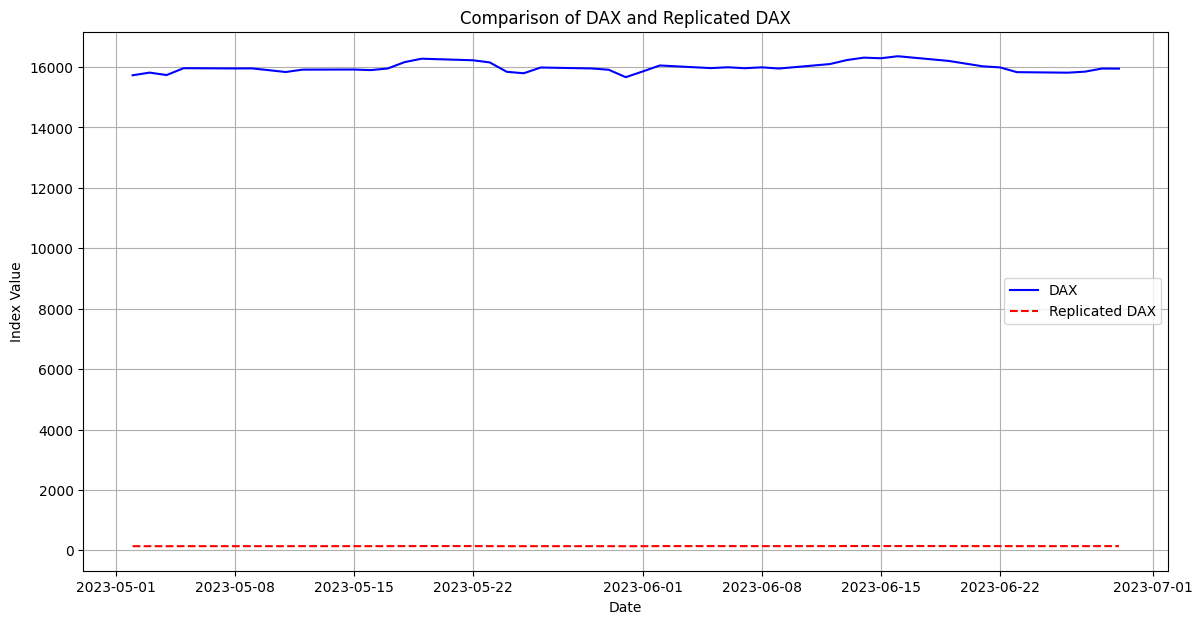

In [33]:
# Wykres

plt.figure(figsize=(14, 7))
plt.plot(comparison_df['DAX'], label='DAX', color='blue')
plt.plot(comparison_df['Replicated DAX'], label='Replicated DAX', color='red', linestyle='--')
plt.title('Comparison of DAX and Replicated DAX')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
print(f"Pearson Correlation: {correlation}")
print(f"Mean Absolute Error (MAE): {mae}")

Pearson Correlation: 0.8937637330925826
Mean Absolute Error (MAE): 15843.670517671602


### Dyskusja na temat warunków koniecznych do dokładnej replikacji

W sekcji dyskusji przedyskutuję warunki, które muszą być spełnione, aby replikacja była bardzo dokładna.

Aby replikacja indeksu była bardzo dokładna, należy spełnić kilka warunków:

1. ### Dokładne dane dotyczące kapitalizacji rynkowej:
  
Wagi spółek muszą być dokładnie oszacowane na podstawie aktualnych danych.

2. ### Aktualizacja składników:

Skład indeksu musi być regularnie aktualizowany, aby odzwierciedlać zmiany w spółkach (np. wchodzenie nowych spółek do indeksu, wychodzenie spółek z indeksu).

3. ### Uwzględnienie dywidend:

Ponieważ DAX jest indeksem dochodowym, należy uwzględnić dywidendy wypłacane przez spółki.

4. ### Płynność i koszty transakcyjne:

Należy brać pod uwagę płynność akcji oraz koszty transakcyjne, które mogą wpłynąć na efektywność replikacji.

5. ### Regularne rebalansowanie portfela:

Wagi spółek w indeksie zmieniają się w czasie, dlatego konieczne jest regularne rebalansowanie portfela.

---

Pasywne fundusze inwestycyjne, takie jak ETF-y, starają się jak najdokładniej replikować indeksy, minimalizując różnice między rzeczywistym portfelem a indeksem, przy jednoczesnym zarządzaniu kosztami i ryzykiem.